In [2]:
import numpy as np
import scipy
import sympy
import seaborn as sns
import matplotlib.pyplot as plt
from abc import ABC

# Uloha 1

In [9]:
class Sir_model():
    def __init__(self, population, initially_infected, r0, epidemy_name, time_span):
        self.n = population
        self.i_0 = initially_infected
        self.r_0 = r0
        self.name = epidemy_name
        self.time_span = time_span
        self.t = np.linspace(0, self.time_span, 1000)
        self.diff_solution = self.sir_differential_solution()
        self.solution_analysis()


    def sir_differential_solution(self):
        v = 1/14 # konstantní doba uzdravení pro všechny nemoci (nenašel jsem jak odvodit beta a v z R_0 a hledat data k jednotlivým nemocem se mi nechce, tak si zjednodušuji práci XD)

        def sir_system(t, y):
            s, i, r = y
            dsdt = (-(self.r_0*v) * i * s / self.n)
            didt = ((self.r_0*v) * i * s / self.n) - (v * i)
            drdt = v * i
            return [dsdt, didt, drdt]

        t_span = (0, self.time_span)
        t_eval = np.linspace(0, self.time_span, 1000)
        initial_conditions = [self.n - self.i_0, self.i_0, 0]
        return (scipy.integrate.solve_ivp(sir_system, t_span, initial_conditions, t_eval=t_eval, dense_output=True))



    def solution_analysis(self):
        epidemy_peak = 0
        for i in range(0, len(self.diff_solution.sol(self.t).T)-1):
            epidemy_peak = i if self.diff_solution.sol(self.t).T[i][1] > self.diff_solution.sol(self.t).T[epidemy_peak][1] else epidemy_peak
            if round(self.diff_solution.sol(self.t).T[i][1]) == 0:
                t_new = np.linspace(0, self.time_span*(i/self.time_span) , 1000)
                last_i = i  
                break
        else:
            last_i = 999
            t_new = self.t
              


        self.end_of_epidemy = last_i #denní změna neonemocněných klesla pod miliontinu populace ^^ (ať je graf přehledný)
        self.grpah_range = t_new
        self.epidemy_peak = round(epidemy_peak)
        self.end_stats = list(map(int, self.diff_solution.sol(self.t).T[self.end_of_epidemy]))



    def plot_sir_graph(self):
        plt.grid(True)
        plt.plot(self.grpah_range, self.diff_solution.sol(self.grpah_range).T)

        # plt.plot([self.epidemy_peak, self.epidemy_peak], [0, self.n], "r--", markersize=1, linewidth=1)
        # plt.plot([0, self.end_of_epidemy], [self.diff_solution.sol(self.t).T[self.epidemy_peak][1], self.diff_solution.sol(self.t).T[self.epidemy_peak][1]], "r--", markersize=1, linewidth=1)
        # plt.plot([self.end_of_epidemy, self.end_of_epidemy], [0, self.n], "k:", markersize=1, linewidth=1)
        
        plt.axvline(self.epidemy_peak, color="red", linestyle="--")
        plt.axvline(self.end_of_epidemy, color="black", linestyle="--")
        plt.xlabel("time")
        plt.ylabel("people")
        plt.legend(
            [
                "suceptibe",
                "infected", 
                "recovered", 
                f"epidemy peak t={self.epidemy_peak}\npeople={round(self.diff_solution.sol(self.t).T[self.epidemy_peak][1])}", 
                f"end of epidemy t={self.end_of_epidemy}"
            ], 
            shadow=True
        )
        
        plt.axhline(self.diff_solution.sol(self.t).T[self.epidemy_peak][1], color="r", linestyle="--")
        plt.title(f"SIR model of {self.name}")
        plt.tight_layout()
        plt.show()

    def plot_final_statistics(self):
        fig = plt.figure(1)
        ax = fig.add_axes([0.16, 0.16, 0.68, 0.68])
        plt.title("Uninfected/Infected")
        ax.title.set_fontsize(30)
        labels = ["Uninfected", "infected"]
        explode = (0.15, 0.0)
        fracs = [self.end_stats[0], self.end_stats[2]]
        colors = ("blue", "green")
        ax.pie(fracs, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=colors)
        plt.show()

    def plot_all(self):
        self.plot_sir_graph()
        self.plot_final_statistics()


hypothetical_population = 10000000
initially_infected = 5



### Tuberkuloza

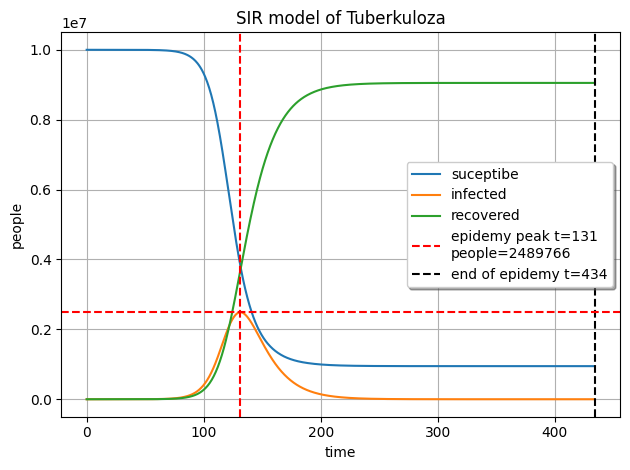

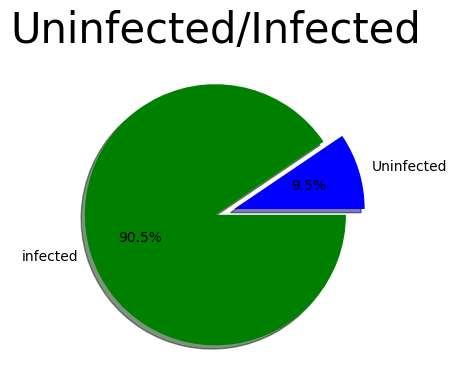

In [10]:
tuberkuloza_sir = Sir_model(
    hypothetical_population, 
    initially_infected, 
    r0=2.6, 
    epidemy_name="Tuberkuloza", 
    time_span=1000
)
tuberkuloza_sir.plot_all()

### Chřipka

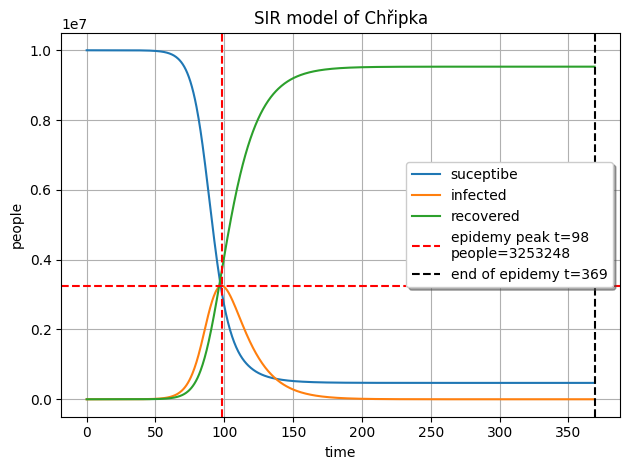

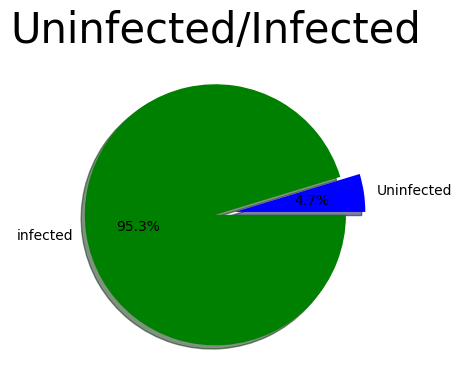

In [11]:
chripka_sir = Sir_model(
    hypothetical_population,
    initially_infected,
    r0=3.2, 
    epidemy_name="Chřipka", 
    time_span=1000
)
chripka_sir.plot_all()

### Zarděnky

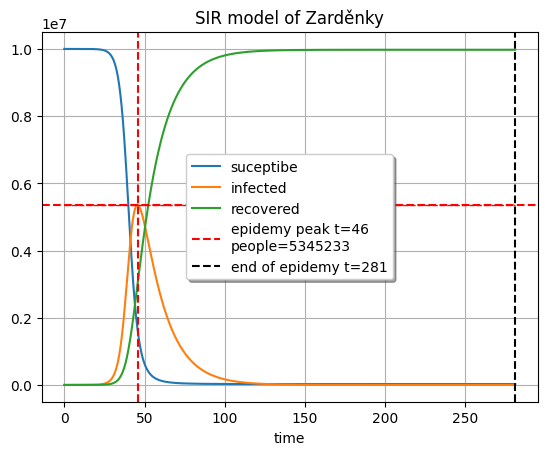

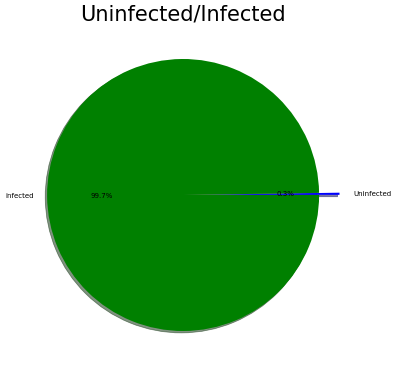

In [174]:
zardenky_sir = Sir_model(
    hypothetical_population, 
    initially_infected, 
    r0=6, 
    epidemy_name="Zarděnky", 
    time_span=1000
)
zardenky_sir.plot_all()

### Černý kašel

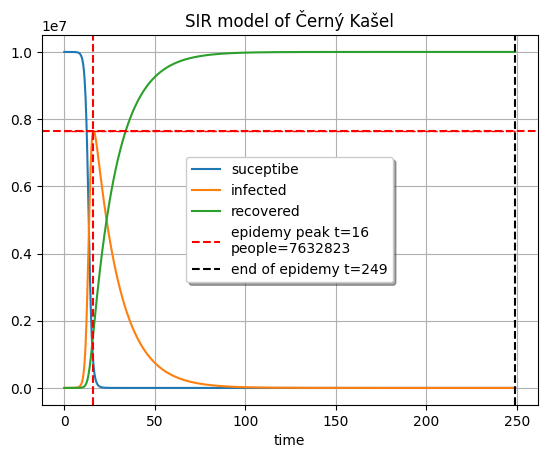

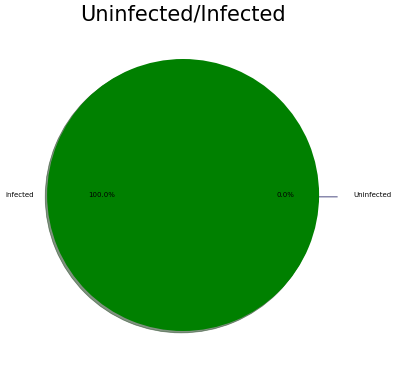

In [173]:
cerny_kasel_sir = Sir_model(
    hypothetical_population, 
    initially_infected, 
    r0=16, 
    epidemy_name="Černý Kašel", 
    time_span=1000
)
cerny_kasel_sir.plot_all()

### Malárie

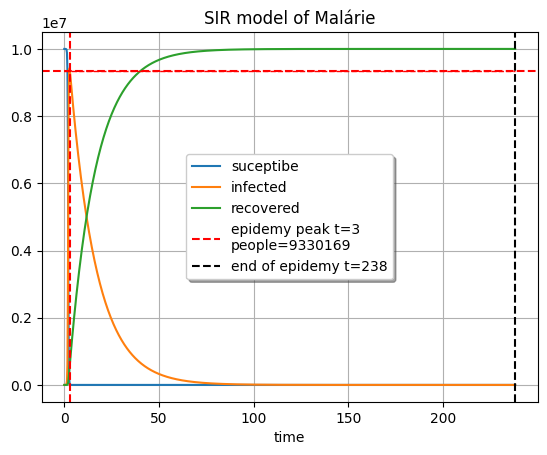

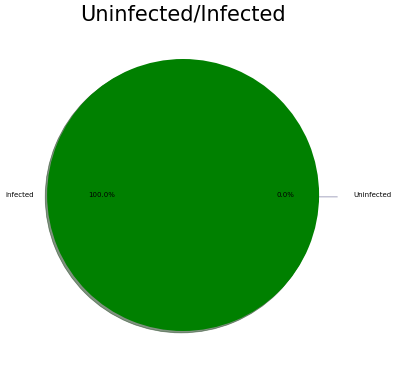

In [172]:
malarie_sir = Sir_model(
    hypothetical_population, 
    initially_infected, 
    r0=100, 
    epidemy_name="Malárie", 
    time_span=1000
)
malarie_sir.plot_all()

# Uloha 2

In [ ]:
class Lotka_volterra_model_abstract(ABC):
    def __init__(self):
        raise Exception("Not implemented")

    def lotka_volterra_system(self):
        raise Exception("Not implemented")

    def differential_solution(self):
        t_span = (0, self.end_time)
        t_eval = np.linspace(0, self.end_time, 1000)
        return (scipy.integrate.solve_ivp(self.lotka_volterra_system, t_span, self.initial_conditions, t_eval=t_eval, dense_output=True, args=self.args))
    
    def plot_time_population_graph(self):
        fig = plt.figure(0)
        plt.grid(True)
        plt.plot(np.linspace(0, self.end_time, 1000), self.diff_solution.sol(np.linspace(0, self.end_time, 1000)).T)
        plt.xlabel("time")
        plt.legend(self.input_names, shadow=True)
        plt.title(f"Lotka Volterra model")
        plt.tight_layout()
        plt.show()

class Lotka_volterra_model_2_spec(Lotka_volterra_model_abstract):
    
    def __init__(self, prey_0, predator_0, alpha, beta, gamma, delta, end_time=1000):
        """
        alpha = birth rate of prey \n
        beta = infulence of predator on prey \n
        

        gamma = death rate of predator \n
        delta = influence of pray on predator \n 
        """
        self.initial_conditions = (prey_0, predator_0)
        self.args = (alpha, beta, gamma, delta)
        self.end_time = end_time
        self.diff_solution = self.differential_solution()
        self.input_names = ("prey", "predators")

    @staticmethod
    def lotka_volterra_system(t, dfdts, alpha, beta, gamma, delta):
            x, y = dfdts
            dxdt = alpha*x - beta*x*y
            dydt = -gamma*y + delta*x*y
            return [dxdt, dydt]

class Lotka_volterra_model_3_spec(Lotka_volterra_model_abstract):
    def __init__(self, prey_0, pred_0, apex_0, alpha, beta, gamma, delta, epsilon, zeta, eta, theta, lota, end_time=1000):
        """
        alpha = birth rate of prey \n
        beta = infulence of predator on prey \n
        gamma = influence of apex predator on prey \n
        

        delta = death rate of predator \n
        epsilon = influence of prey on predator \n
        zeta = influence of apex predator on predator \n


        eta = death rate of apex predator \n
        theta = influence of predator on apex predator \n
        lota = influence of predator on apex predator \n
        """
        self.initial_conditions = (prey_0, pred_0, apex_0)
        self.args = (alpha, beta, gamma, delta, epsilon, zeta, eta, theta, lota)
        self.end_time = end_time
        self.diff_solution = self.differential_solution()
        self.input_names = ("prey", "predators", "apex predators")

    @staticmethod
    def lotka_volterra_system(t, dfdts, alpha, beta, gamma, delta, epsilon, zeta, eta, theta, lota):
            x, y, z = dfdts
            dxdt = alpha*x - beta*x*y - gamma*x*z
            dydt = -delta*y + epsilon*x*y - zeta*y*z
            dzdt = -eta*z + theta*y*z + lota*x*z
            return [dxdt, dydt, dzdt]

### kořist a lovci

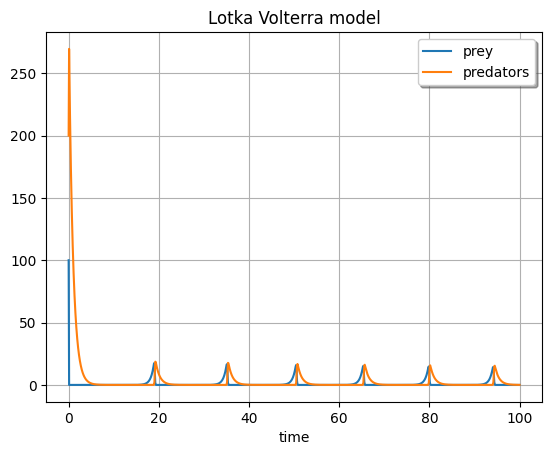

In [208]:
lv1 = Lotka_volterra_model_2_spec(
    prey_0=100,
    predator_0= 200, 
    alpha=1.5, 
    beta=1.2, 
    gamma=1.1, 
    delta=1.2, 
    end_time=100
)
lv1.plot_time_population_graph()

### kořist, lovci a lovci na vrcholku potravního řetězce

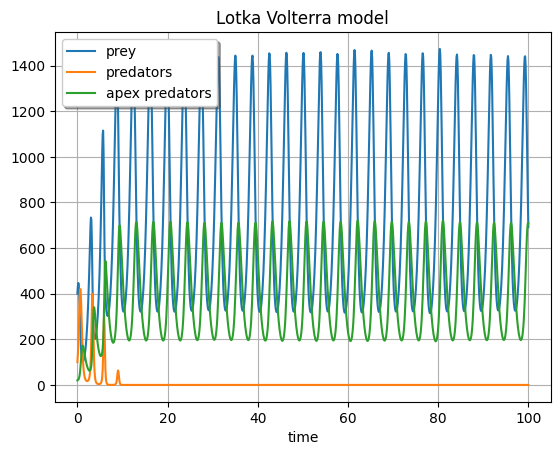

In [209]:
lv2 = Lotka_volterra_model_3_spec(
    prey_0=400,       # Počáteční populace kořisti
    pred_0=100,       # Počáteční populace predátorů
    apex_0=20,        # Počáteční populace vrcholových predátorů
    alpha=2.0,        # Porodnost kořisti
    beta=0.01,        # Vliv predátorů na kořist
    gamma=0.005,      # Vliv vrcholových predátorů na kořist
    delta=1.0,        # Úmrtnost predátorů
    epsilon=0.01,     # Vliv kořisti na predátory
    zeta=0.02,        # Vliv vrcholových predátorů na predátory
    eta=1.5,          # Úmrtnost vrcholových predátorů
    theta=0.01,       # Vliv predátorů na vrcholové predátory
    lota=0.002,       # Vliv kořisti na vrcholové predátory
    end_time=100      # Délka simulace
)
lv2.plot_time_population_graph()

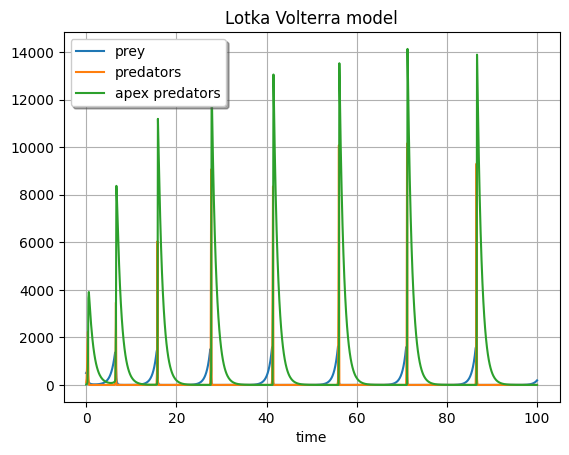

In [210]:
lv3 = Lotka_volterra_model_3_spec(
    prey_0=500,        # Více kořisti na začátku
    pred_0=100,        # Dostatečná populace predátorů
    apex_0=20,         # Menší populace vrcholových predátorů
    alpha=1.2,         # Stabilní porodnost kořisti
    beta=0.003,        # Slabší vliv predátorů na kořist (aby zůstalo dost kořisti)
    gamma=0.001,       # Velmi slabý vliv vrcholových predátorů na kořist
    delta=0.5,         # NIŽŠÍ úmrtnost predátorů
    epsilon=0.02,      # VYŠŠÍ vliv kořisti na růst predátorů
    zeta=0.008,        # Slabší vliv vrcholových predátorů na predátory
    eta=1.0,           # Standardní úmrtnost vrcholových predátorů
    theta=0.01,        # Střední vliv predátorů na vrcholové predátory
    lota=0.002,        # Slabší vliv kořisti na vrcholové predátory
    end_time=100      # Delší simulace pro ověření dlouhodobé stability
)
lv3.plot_time_population_graph()

Vstupní proměnné pro lv1, 2 i 3 byly generovány umělou inteligencí pro generaci něčím zajímavých grafů

# Ukol 3 

# Simulace finančního portfolia (Monte Carlo Model)

weight je cajk


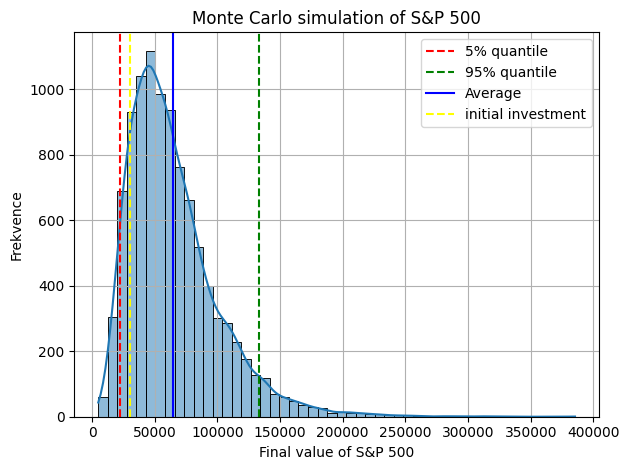

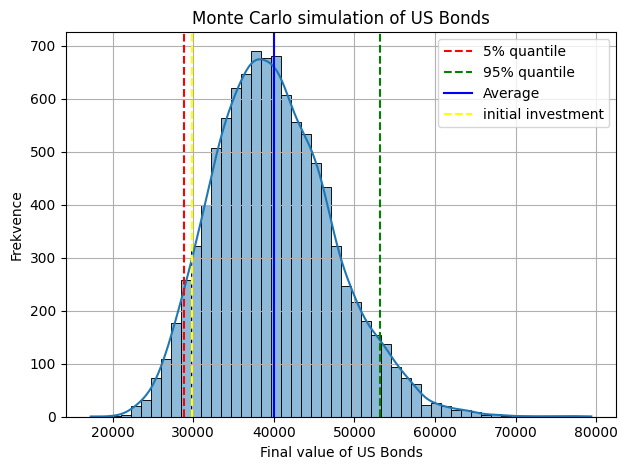

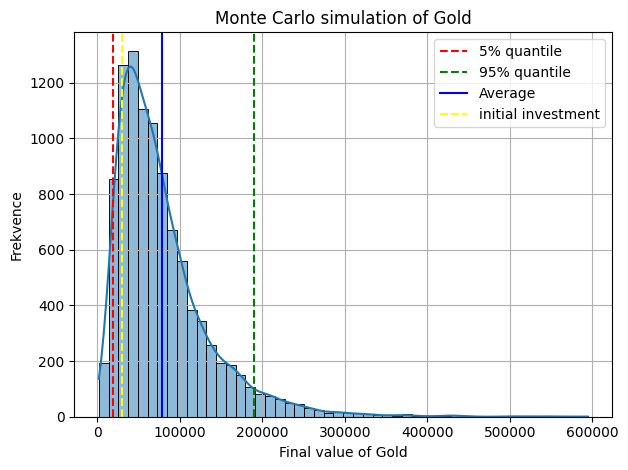

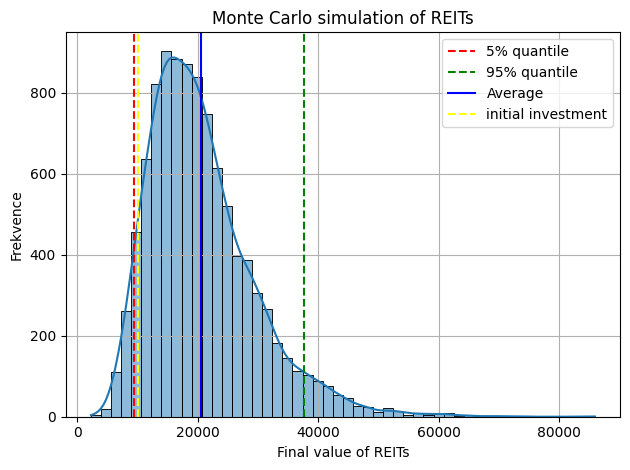

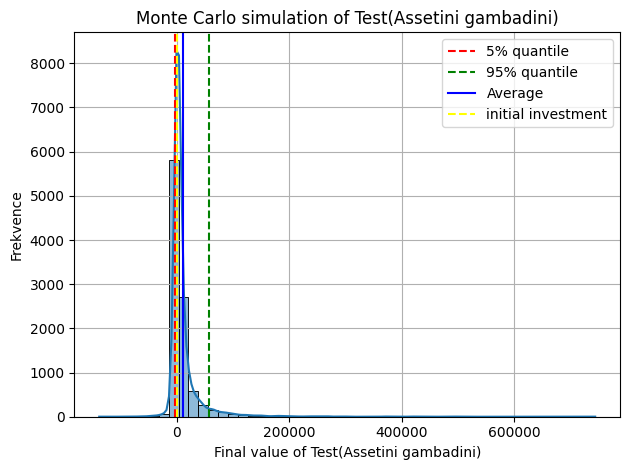

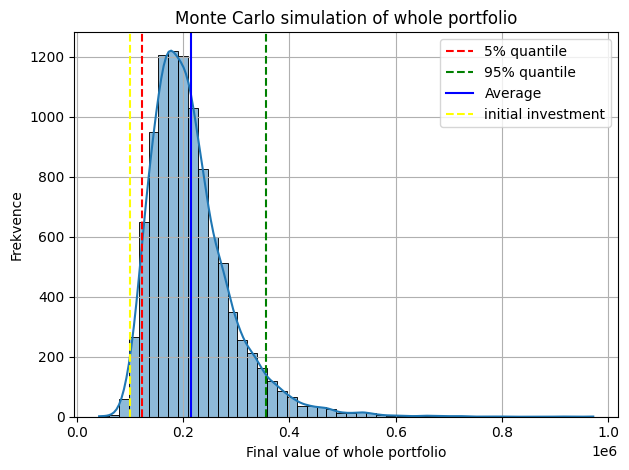

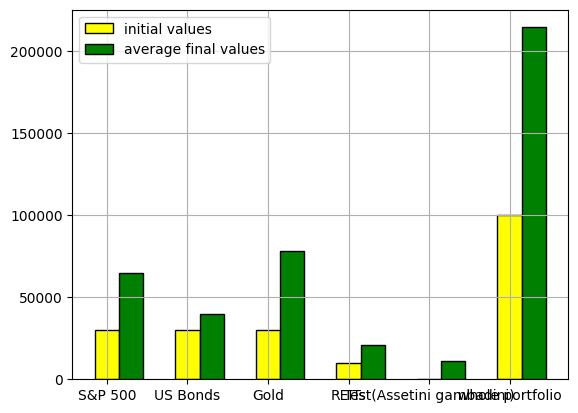

In [16]:
def check_weight(assets_dict:dict):
    sum = 0
    for dict in assets_dict.values():
        sum += dict["weight"]
    return sum

def simulate_portfolio(years, assets, initial_investment):
    asset_return = list(initial_investment * asset["weight"] for asset in assets.values())
    for i in range(years):
        annual_return = 0
        asset_index = 0
        for asset in assets.values():
            r = np.random.normal(asset["mean"], asset["volatility"])
            annual_return += asset["weight"] * r
            asset_return[asset_index] *= (1+r)
            asset_index += 1
    return asset_return

def plot_asset_breakdown(graph_index, values, name, initial_investment, mean):
    plt.figure(graph_index)
    sns.histplot(values, bins=50, kde=True)
    plt.axvline(np.percentile(values, 5), color="red", linestyle="--", label="5% quantile")
    plt.axvline(np.percentile(values, 95), color="green", linestyle="--", label="95% quantile")
    plt.axvline(mean, color="blue", linestyle="-", label="Average")
    plt.axvline(initial_investment, color="yellow", linestyle="--", label="initial investment")
    plt.title(f"Monte Carlo simulation of {name}")
    plt.xlabel(f"Final value of {name}")
    plt.ylabel("Frekvence")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_asset_mean_percentage_gain_comparison(graph_index, initial_vals, asset_means, names, initial_portfolio_val, portfolio_mean, asset_dict):
    plt.figure(graph_index)
    bars1 = initial_vals + [initial_portfolio_val]
    bars2 = asset_means + [portfolio_mean]
    names_new = names + ["whole portfolio"]
    N = len(initial_vals) + 1
    indexes = np.arange(N)
    width = 0.30
    plt.bar(indexes, bars1, width, color='yellow', edgecolor='black', label='initial values', tick_label=names_new)
    plt.bar(indexes+width, bars2, width, color='green', edgecolor='black', label='average final values')
    plt.grid(True) 
    plt.legend(loc="upper left")
    plt.show()

def plot_and_process_individual_assets(assets, portfolio, asset_dict, initial_investment):
    graph_index = 0

    initial_asset_values = list()
    means = list()
    names = list()
    portfolio_mean = np.mean(portfolio)

    for asset, values in asset_dict.items():
        mean = np.mean(assets[graph_index])
        initial_asset_value = values["weight"]*initial_investment
        means.append(mean)
        initial_asset_values.append(initial_asset_value)
        names.append(asset)
        plot_asset_breakdown(graph_index, assets[graph_index], asset, initial_asset_value, mean)
        graph_index += 1

    plot_asset_breakdown(graph_index, portfolio, "whole portfolio", initial_investment,portfolio_mean)

    plot_asset_mean_percentage_gain_comparison(graph_index, initial_asset_values, means, names, initial_investment, portfolio_mean, asset_dict)

def main():
    n_years = 10
    n_simulations = 10000
    initial_funds = 100000

    assets_dict = {
        "S&P 500":{"mean": 0.08, "volatility": 0.18,
                "weight": 0.3}, # set value
        
        "US Bonds":{"mean": 0.03, "volatility": 0.06, 
                "weight": 0.3}, # set value
        
        "Gold":{"mean": 0.1, "volatility": 0.23, 
                "weight": 0.3}, # set value
        
        "REITs":{"mean": 0.075, "volatility": 0.14, 
                "weight": 0.1}, # set value

        "Test(Assetini gambadini)":{"mean": 0.5, "volatility": 0.80, 
                "weight": 0}, # set value

        #TODO (vice assetů ^^) 
    }

    chosen_assets = dict()
    for key, val in assets_dict.items():
        if val["weight"] != 0:
            chosen_assets[key] = val

    assert 1.000001 > check_weight(chosen_assets) and 0.999999 < check_weight(chosen_assets)
    print("weight je cajk")

    portfolio_results = list()
    asset_results = list()

    for i in range(len(chosen_assets)):
        asset_results.append(list())
    for i in range(n_simulations):
        sim_results = simulate_portfolio(n_years, chosen_assets, initial_funds)
        portfolio_results.append(sum(sim_results))
        for j in range(len(sim_results)):
            asset_results[j].append(sim_results[j])

    portfolio_results = np.array(portfolio_results)
    asset_results = np.array(asset_results)

    plot_and_process_individual_assets(asset_results, portfolio_results, chosen_assets, initial_funds)

if __name__ == "__main__":
    main()